#### Fraud identification problem is one of the cases where we will have imbalanced dataset i.e the fraud transactions will be very few in numbers. So if we don't apply specific techniques we will not be able to get a proper model.

#### In this notebook we will start applying standard approach of a classification problem and see why it doesn't work and what will be the alternative approaches.

#### Import the libraries.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

#### Load the data.

In [42]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")

#### Explore the data.

In [43]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### So 'Class' is the target variable and let's see how it is distributed in the dataset and then we can understand why it is called a imbalanced dataset.

In [45]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

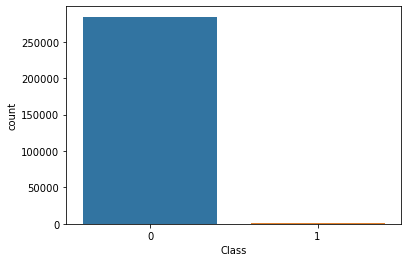

In [46]:
sns.countplot(x='Class', data=data)

#### We can visualize the number of entries with Class=1 (Fraud) is very less compared to Class=0 (Not-Fraud).

#### Next we will split the data into train_set and validation_set.

In [47]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data, test_size=0.25, random_state=42)
print(train_data.shape, val_data.shape)

(213605, 31) (71202, 31)


#### Since all V* columns are already scaled we will scale only the 'Time' and 'Amount' columns.

In [48]:
train_label = train_data['Class']
val_label   = val_data['Class']
train_data  = train_data.drop(['Class'], axis=1)
val_data    = val_data.drop(['Class'], axis=1)
print(train_data.shape, val_data.shape, train_label.shape, val_label.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


In [49]:
train_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20


In [50]:
val_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12


In [51]:
from sklearn.preprocessing import StandardScaler

std_scaler_Time   = StandardScaler()
std_scaler_Amount = StandardScaler()

train_data['Time']   = std_scaler_Time.fit_transform(train_data[['Time']])
train_data['Amount'] = std_scaler_Amount.fit_transform(train_data[['Amount']])

val_data['Time']   = std_scaler_Time.transform(val_data[['Time']])
val_data['Amount'] = std_scaler_Amount.transform(val_data[['Amount']])

In [52]:
train_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,-0.738270,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,-0.196016
52800,-1.035079,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,-0.107223


In [53]:
val_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.122333,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.073794
49906,-1.064290,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.681590


#### Create a standard function to display model performance metrices.

In [54]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, classification_report

def model_def(model, model_name, m_train_data, m_train_label):
    model.fit(m_train_data, m_train_label)
    s = "predict_"
    p = s + model_name
    p = model.predict(m_train_data)
    cm = confusion_matrix(m_train_label, p)
    print("Confusion Matrix: \n", cm)
    cr = classification_report(m_train_label, p, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report: \n", cr)
    precision = np.diag(cm)/np.sum(cm, axis=0)
    recall    = np.diag(cm)/np.sum(cm, axis=1)
    F1 = 2 * np.mean(precision) * np.mean(recall)/(np.mean(precision) + np.mean(recall))
    cv_score = cross_val_score(model, m_train_data, m_train_label, cv=10, scoring='recall')
    print("Mean CV Score     :", cv_score.mean())
    print("Std Dev CV Score  :", cv_score.std())

#### Let's apply Logistic Regreesion algorithm on the dataset.

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', C=0.5)
model_def(logreg, "logreg", train_data, train_label)

Confusion Matrix: 
 [[213199     27]
 [   137    242]]
Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    213226
       Fraud       0.90      0.64      0.75       379

    accuracy                           1.00    213605
   macro avg       0.95      0.82      0.87    213605
weighted avg       1.00      1.00      1.00    213605

Mean CV Score     : 0.6305120910384068
Std Dev CV Score  : 0.07487696695249359


#### Here you can see the problem. Our overall model accuracy is 1.00 but Recall for Fraud class is just 0.64 which means there is lots of misclassification for Fraud class. As per the confusion matrix out (242 + 137) = 379 Fraud class only 242 are classified properly and this has happened because of imbalanced representation of data.

In [65]:
val_data_logreg = logreg.predict(val_data)
print("Logistic Regression: \n", confusion_matrix(val_label, val_data_logreg))

Logistic Regression: 
 [[71077    12]
 [   45    68]]


#### We can see that just 68 out of 113 are predicted properly.

#### Here is the alternative approach - creating synthetic data i.e the data that does not exist in the original dataset and there are 2 main techinques to do this - NearMiss and SMOTE.

### **NearMiss Algorithm – Undersampling**

#### NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, it removes the instances of the majority class to increase the spaces between the two classes. 

#### The basic intuition about the working of near-neighbor methods is as follows:

#### Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
#### Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
#### Step 3: If there are k instances in the minority class, the nearest method will result in k * n instances of the majority class.

Reference : https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [57]:
from imblearn.under_sampling import NearMiss

print("Before Undersampling, counts of label '1': {}".format(sum(train_label == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(train_label == 0))) 
  
nr = NearMiss() 
  
train_data_miss, train_label_miss = nr.fit_sample(train_data, train_label.ravel()) 
  
print("After Undersampling, counts of label '1': {}".format(sum(train_label_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(train_label_miss == 0))) 

Before Undersampling, counts of label '1': 379
Before Undersampling, counts of label '0': 213226 

After Undersampling, counts of label '1': 379
After Undersampling, counts of label '0': 379


#### So we can see count of majority class i.e Class=0 is reduced to the same count of Class=1 and the dataset has become balanced.
 
#### Now we will apply Logistic Regression with the same parameters on this undersampled data.

In [58]:
logreg_miss = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', C=0.5)
model_def(logreg_miss, "logreg_miss", train_data_miss, train_label_miss)

Confusion Matrix: 
 [[377   2]
 [ 24 355]]
Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       0.94      0.99      0.97       379
       Fraud       0.99      0.94      0.96       379

    accuracy                           0.97       758
   macro avg       0.97      0.97      0.97       758
weighted avg       0.97      0.97      0.97       758

Mean CV Score     : 0.915647226173542
Std Dev CV Score  : 0.04200061001317491


In [59]:
val_data_miss   = logreg_miss.predict(val_data)
print("Logistic Regression - Undersampling: \n", confusion_matrix(val_label, val_data_miss))

Logistic Regression - Undersampling: 
 [[47844 23245]
 [    9   104]]


#### Here we see the improvement - 104 out of 113 are predicted properly. So the model has become more accurate but at the cost of low precision.

### **SMOTE (Synthetic Minority Oversampling Technique) – Oversampling**

#### SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
#### It aims to balance class distribution by randomly increasing minority class examples by replicating them.
#### SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.

Reference - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [60]:
from imblearn.over_sampling import SMOTE

print("Before Oversampling, counts of label '1': {}".format(sum(train_label == 1))) 
print("Before Oversampling, counts of label '0': {} \n".format(sum(train_label == 0))) 
  
sm = SMOTE(random_state=42) 
  
train_data_SMOTE, train_label_SMOTE = sm.fit_sample(train_data, train_label.ravel()) 
  
print("After Oversampling, counts of label '1': {}".format(sum(train_label_SMOTE == 1))) 
print("After Oversampling, counts of label '0': {}".format(sum(train_label_SMOTE == 0))) 

Before Oversampling, counts of label '1': 379
Before Oversampling, counts of label '0': 213226 

After Oversampling, counts of label '1': 213226
After Oversampling, counts of label '0': 213226


#### So we can see count of minority class i.e Class=1 is increased to the same count of Class=0 and the dataset has become balanced.
 
#### Now we will apply Logistic Regression with the same parameters on this oversampled data.

In [61]:
logreg_SMOTE = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', C=0.5)
model_def(logreg_SMOTE, "logreg_SMOTE", train_data_SMOTE, train_label_SMOTE)

Confusion Matrix: 
 [[207724   5502]
 [ 16522 196704]]
Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       0.93      0.97      0.95    213226
       Fraud       0.97      0.92      0.95    213226

    accuracy                           0.95    426452
   macro avg       0.95      0.95      0.95    426452
weighted avg       0.95      0.95      0.95    426452

Mean CV Score     : 0.9225610371179387
Std Dev CV Score  : 0.002101615392933071


In [62]:
val_data_SMOTE  = logreg_SMOTE.predict(val_data)
print("Logistic Regression - Oversampling: \n", confusion_matrix(val_label, val_data_SMOTE))

Logistic Regression - Oversampling: 
 [[69217  1872]
 [    8   105]]


#### Here we see the real advantage - 105 out of 113 are predicted properly. So the model has become more accurate and look at the Precision compared to that of NearMiss algorithm. So by far this is the most effective model.

#### Since the most effective model by far is SMOTE and where the datset has become almost doubled we will fit this dataset to an Artificial Neural Network (ANN) to see how it goes.

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [73]:
# Applying Neural Network
def build_classifier():
    classifier = Sequential([Dense(128, activation='relu', input_shape=(train_data_SMOTE.shape[1], )),
                             Dropout(rate=0.1),
                             Dense(64, activation='relu'),
                             Dropout(rate=0.1),
                             Dense(1, activation='sigmoid')])

    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'Recall'])
    print(classifier.summary())
    return classifier

model = KerasClassifier(build_fn=build_classifier)

In [74]:
history = model.fit(train_data_SMOTE, train_label_SMOTE,
                    batch_size=30,
                    epochs=10,
                    validation_data=(val_data, val_label))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
Train on 426452 samples, validate on 71202 samples
Epoch 1/10
426452/426452 [==============================] - 34

In [75]:
val_data_Neural = model.predict(val_data)
print("Artificial Neural Network: \n", confusion_matrix(val_label, val_data_Neural))

Artificial Neural Network: 
 [[71038    51]
 [   16    97]]


#### So we can see in the ANN model the Precision is highest but the Recall is compromised slightly as compared to SMOTE.